## This notebook will be used for making some preliminary plots and exploring the features of the data set

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Pokemon.csv')
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


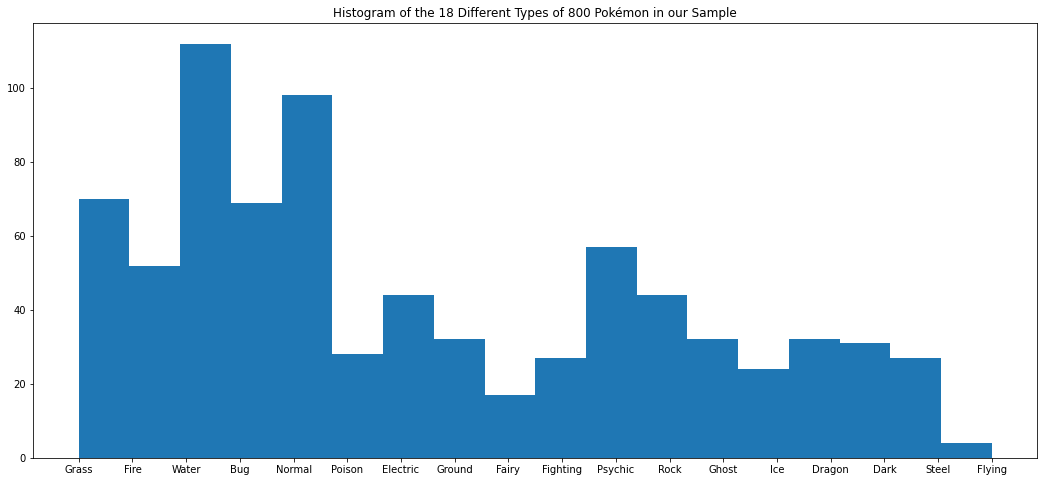

In [18]:
poke_type = data['Type 1']
plt.figure(figsize = [18,8])
plt.hist(poke_type, bins = 18)
plt.title('Histogram of the 18 Different Types of 800 Pokémon in our Sample', fontsize = 12)
plt.savefig('Poke_hist.pdf')

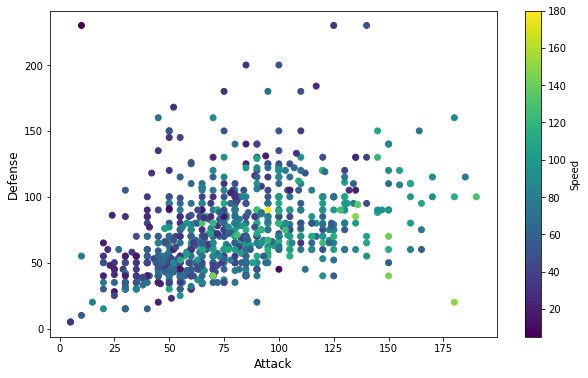

In [30]:
attack = data['Attack']
defense = data['Defense']
speed = data['Speed']
plt.figure(figsize = [10,6])
plt.scatter(attack, defense, c = speed, cmap = 'viridis')
plt.colorbar(label = 'Speed')
plt.xlabel('Attack', fontsize = 12)
plt.ylabel('Defense', fontsize = 12)
plt.savefig('atk_vs_def_vs_speed.pdf')